# Change Data type of pandas series 

In [1]:
import pandas as pd

In [2]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Now to the change. We will change beer servings to float from int

In [5]:
drinks.beer_servings.astype(float)

0        0.0
1       89.0
2       25.0
3      245.0
4      217.0
       ...  
188    333.0
189    111.0
190      6.0
191     32.0
192     64.0
Name: beer_servings, Length: 193, dtype: float64

In [6]:
drinks['beer_servings']=drinks.beer_servings.astype(float)

In [7]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Tadaaaa

How do you define type of each column before reading the csv?

In [14]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry',dtype={'beer_Servings':int})

In [15]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [16]:
orders=pd.read_table('http://bit.ly/chiporders')

In [17]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [18]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [19]:
orders.item_price.str.replace('$','').astype(float).mean()

7.464335785374397

That gave you the average price of an item!

In [20]:
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

Now what if you want 0s  and 1s?

In [22]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

Now 

# GROUPBY in Pandas

In [23]:
import pandas as pd

In [24]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [25]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
drinks.beer_servings.mean()

106.16062176165804

In [27]:
drinks.beer_servings.mean().groupby('continent')

AttributeError: 'float' object has no attribute 'groupby'

Now that didn't work because syntax was wrong

In [28]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Damn. So Europeans drink a lot!

How does this work though?


In [32]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

this operation is repeated multiple times!

Groupby should be used when you want to analyze some panda series by some category

In [33]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [34]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [36]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [37]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


neat trick eh?

In [39]:
%matplotlib inline

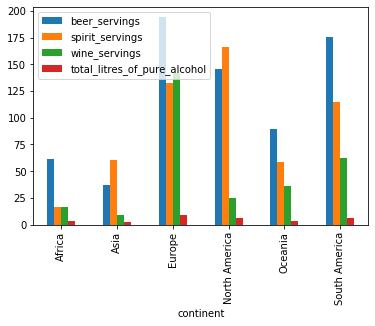

In [40]:
drinks.groupby('continent').mean().plot(kind='bar')

My mind is literally blowing into a thousand pieces right now even though the instructor is saying that the graph isn't that good!

# Explore Pandas Series

In [41]:
import pandas as pd

In [42]:
movies=pd.read_csv('http://bit.ly/imdbratings')

In [43]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [45]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [46]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [47]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [48]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

In [49]:
movies.genre.value_counts(normalize=True).head()

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Name: genre, dtype: float64

What other dataframe and series methods do i already know that i might like to chain onto this command

In [50]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [51]:
movies.genre.nunique()

16

In [52]:
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Nice!

In [53]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [54]:
movies.duration.mean()

120.97957099080695

In [55]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

In [56]:
%matplotlib inline

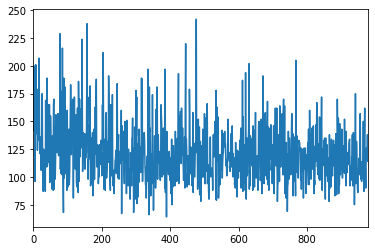

In [57]:
movies.duration.plot()

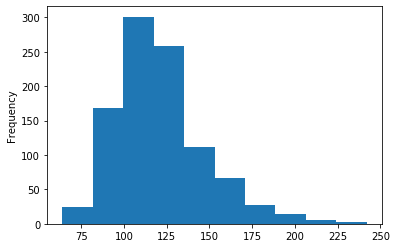

In [58]:
movies.duration.plot(kind='hist')

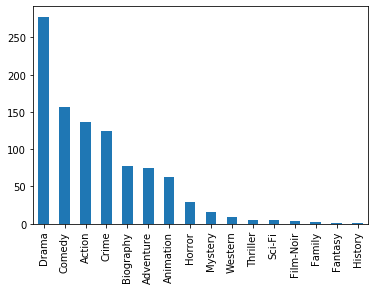

In [59]:
movies.genre.value_counts().plot(kind='bar')